In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset

In [2]:
df = pd.read_csv('/Users/sandipshrestha/My Files/BIT-2020/python/DataSet/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Describe the dataset: number of rows, columns, data types.

In [5]:
print("Number of rows and columns:")
df.shape


Number of rows and columns:


(891, 12)

In [6]:
print("\nData types:")
df.dtypes


Data types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Summarize numerical features: mean, median, mode, range, standard deviation.

In [7]:
df1 = df.select_dtypes(include=['int64','float64'])

In [8]:
mean = df1.mean()

In [9]:
median = df1.median()

In [10]:
mode = df1.mode().iloc[0]

In [11]:
range = df1.max() - df1.min()

In [12]:
std = df1.std()

In [13]:
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Range': range,
    'Standard Deviation': std,
})

print(summary_df)

                   Mean    Median   Mode     Range  Standard Deviation
PassengerId  446.000000  446.0000   1.00  890.0000          257.353842
Survived       0.383838    0.0000   0.00    1.0000            0.486592
Pclass         2.308642    3.0000   3.00    2.0000            0.836071
Age           29.699118   28.0000  24.00   79.5800           14.526497
SibSp          0.523008    0.0000   0.00    8.0000            1.102743
Parch          0.381594    0.0000   0.00    6.0000            0.806057
Fare          32.204208   14.4542   8.05  512.3292           49.693429


## Explore categorical features: frequency distribution, unique values.

In [14]:
df2 = df.select_dtypes(include=['object'])

In [18]:
# Categorical columns
cat_col = [col for col in df2.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [30]:
for column in df2:
    print(f"\nFrequency distribution of '{column}':")
    print(df[column].value_counts())
    print(f"\nUnique values in '{column}':")
    print(df[column].unique())


Frequency distribution of 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Unique values in 'Name':
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 

## Visualize distributions: histograms, box plots.

In [25]:
df3 = df.select_dtypes(include=['int64', 'float64']).drop(['PassengerId', 'SibSp', 'Pclass'], axis=1)

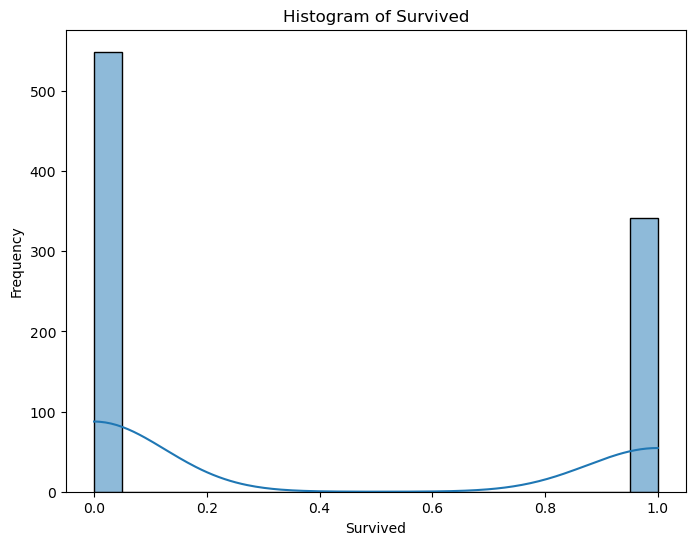

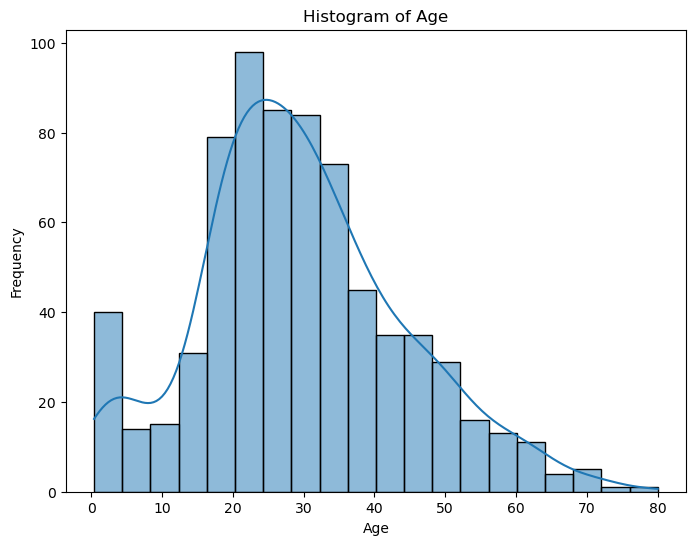

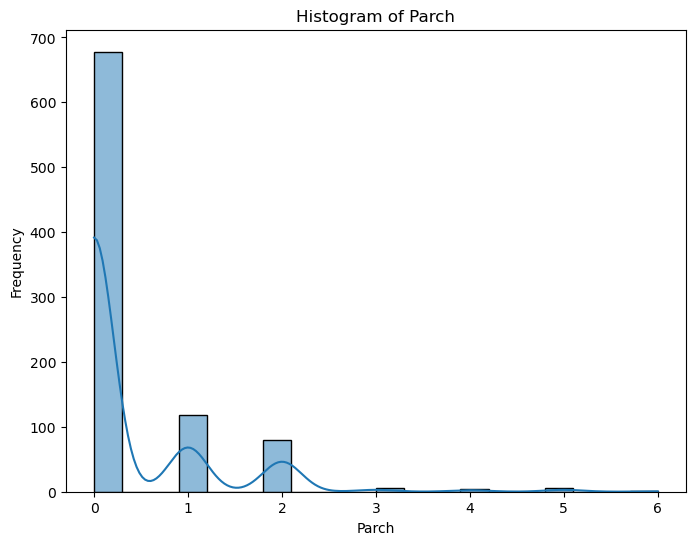

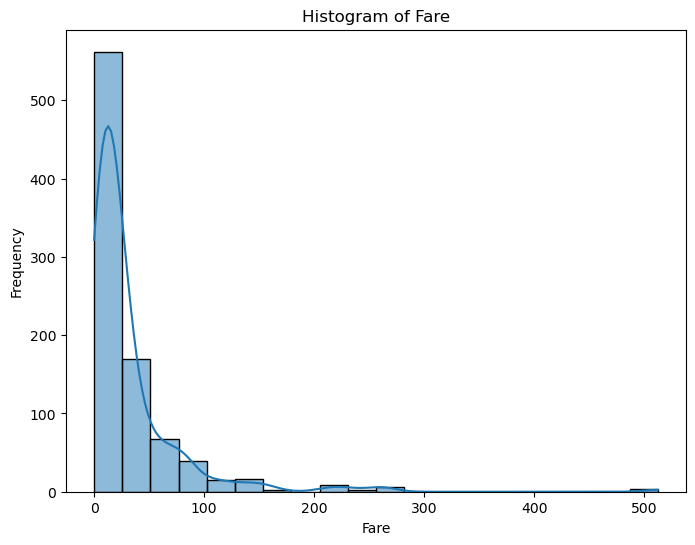

In [28]:
import seaborn as sns
# Visualize distributions: histograms
for column in df3:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

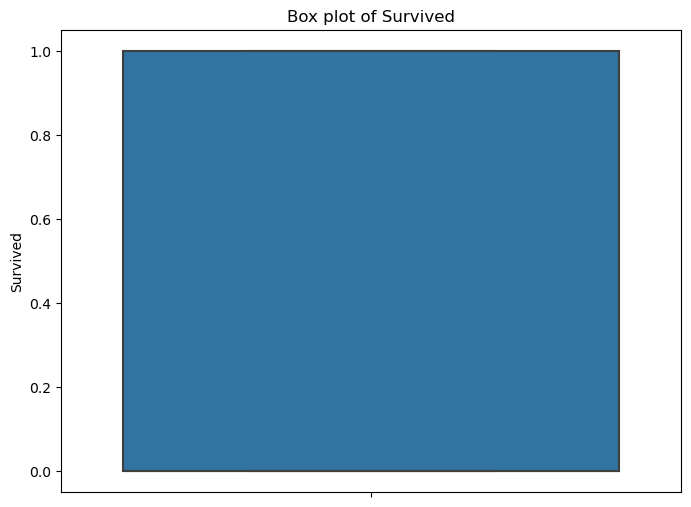

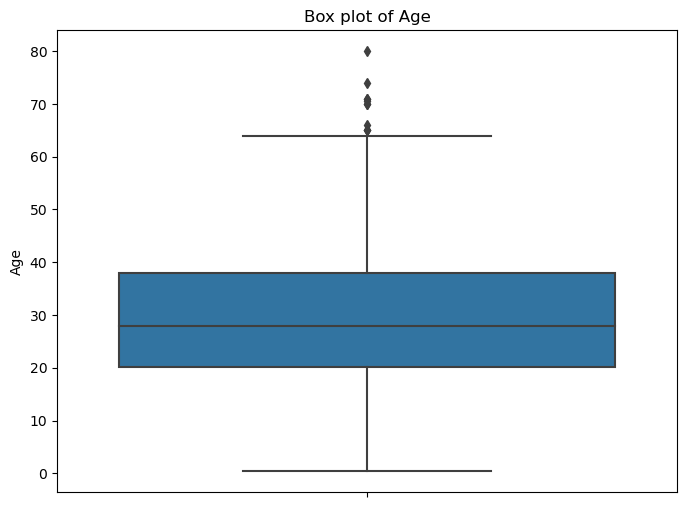

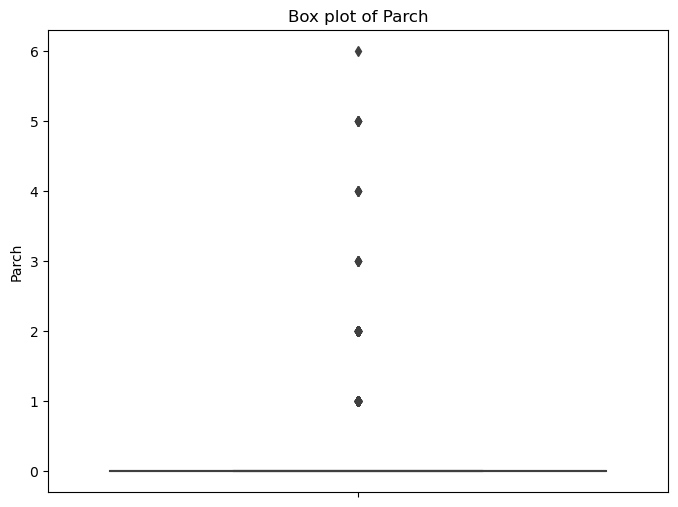

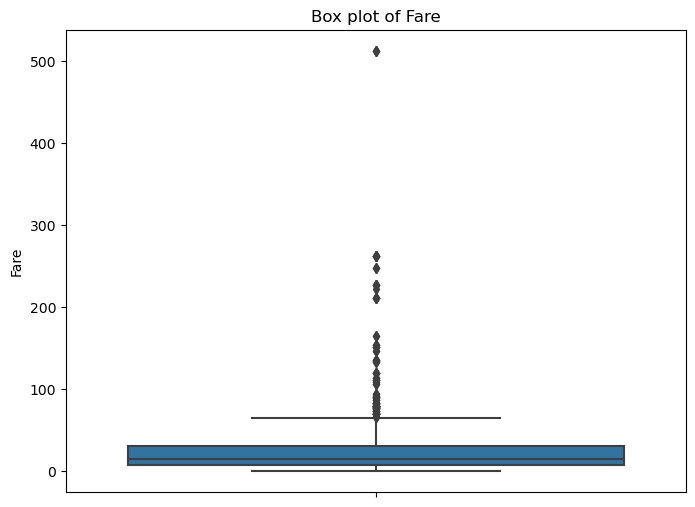

In [29]:
# Visualize distributions: box plots
for column in df3:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
    plt.show()

## Identify outliers and handle them appropriately.

In [32]:
z_scores = (df1 - df1.mean())

In [33]:
outlier_threshold = 3

In [34]:
outliers = df[(z_scores > outlier_threshold) | (z_scores < -outlier_threshold)]

In [35]:
cleaned_df = df.drop(outliers.index)

In [37]:
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,7.2500,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,71.2833,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,7.9250,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,53.1000,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0000,NaN,NaN
887,888.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN
888,889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.4500,NaN,NaN
889,890.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN
